# Explore cryptocurrencies

In [1]:
%load_ext autoreload
%autoreload 2
 
import src.data_utils.loaders as loaders
import src.config.config as config
import pandas as pd
import matplotlib.pyplot as plt
from src.data_utils.processing import *
from src.data_utils.formatters import *

## Load data

Source is described in README.md.

### Load dogecoin

In [2]:
dogecoin_price_df = loaders.load_data(
    config.RAW_DIR,
    config.RAW_DOGE_PRICE_PATH,
    types=config.DOGE_DTYPES,
    separator=config.CSV_SEPARATOR_DOGEUSDT,
)
print(f"Initial loaded: {len(dogecoin_price_df)} rows.")

Initial loaded: 3358599 rows.


### Load other cryptocurencies



In [3]:
control_dfs = {}

for f in config.RAW_CRYPTO_PRICE_PATHS:

    coin = f.replace("USDT.csv", "")
    df = loaders.load_data(
        config.RAW_DIR,
        f,
        types=config.DOGE_DTYPES,
        separator=config.CSV_SEPARATOR_DOGEUSDT,
    )

    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

    first_date = df["timestamp"].min().strftime("%Y-%m-%d %H:%M:%S")
    last_date = df["timestamp"].max().strftime("%Y-%m-%d %H:%M:%S")
    
    df.set_index("timestamp", inplace=True)

    control_dfs[coin] = df["open"]

    print(coin)
    print(f"Initial Musk posts loaded: {len(df)} rows.")
    print(f"Timeline starts {first_date} ends {last_date}\n\n")



BNB
Initial Musk posts loaded: 4274713 rows.
Timeline starts 2017-11-06 03:54:00 ends 2025-12-28 08:48:00


BTC
Initial Musk posts loaded: 4392781 rows.
Timeline starts 2017-08-17 04:00:00 ends 2025-12-29 15:41:00


ETH
Initial Musk posts loaded: 4393766 rows.
Timeline starts 2017-08-17 04:00:00 ends 2025-12-30 08:07:00


FLOKI
Initial Musk posts loaded: 1395578 rows.
Timeline starts 2023-05-05 18:00:00 ends 2025-12-29 21:37:00


SOL
Initial Musk posts loaded: 2828913 rows.
Timeline starts 2020-08-11 06:00:00 ends 2025-12-28 18:16:00




### Join cryptocurrencies into one dataframe

Begin and end will be based on Dogecoin.

In [4]:
dogecoin_price_df["timestamp"] = pd.to_datetime(
    dogecoin_price_df["timestamp"], unit="s"
)
dogecoin_price_df.set_index("timestamp", inplace=True)
doge_open = dogecoin_price_df["open"]


data = pd.DataFrame({"DOGE": doge_open})

for coin, series in control_dfs.items():
    data[coin] = series


data = data.asfreq("1min")

data = data.interpolate(method="linear")
display(data.info())
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3361668 entries, 2019-07-05 12:00:00 to 2025-11-24 23:47:00
Freq: min
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   DOGE    float64
 1   BNB     float64
 2   BTC     float64
 3   ETH     float64
 4   FLOKI   float64
 5   SOL     float64
dtypes: float64(6)
memory usage: 179.5 MB


None

,DOGE,BNB,BTC,ETH,FLOKI,SOL
timestamp,,,,,,
2019-07-05 12:00:00,0.00449,33.2665,11177.11,292.72,NaN,NaN
2019-07-05 12:01:00,0.00420,33.2003,11202.70,292.39,NaN,NaN
2019-07-05 12:02:00,0.00430,33.2524,11223.87,293.16,NaN,NaN
2019-07-05 12:03:00,0.00445,33.2223,11194.73,293.32,NaN,NaN
2019-07-05 12:04:00,0.00425,33.2187,11215.75,292.98,NaN,NaN


,DOGE,BNB,BTC,ETH,FLOKI,SOL
timestamp,,,,,,
2025-11-24 23:43:00,0.15213,865.58,88404.36,2960.21,0.000049,138.68
2025-11-24 23:44:00,0.15213,865.68,88374.01,2958.07,0.000049,138.72
2025-11-24 23:45:00,0.15223,866.50,88428.56,2963.05,0.000049,138.84
2025-11-24 23:46:00,0.15216,866.40,88388.39,2961.20,0.000049,138.67
2025-11-24 23:47:00,0.15205,866.06,88337.49,2960.22,0.000049,138.59


## Vizualization of prices

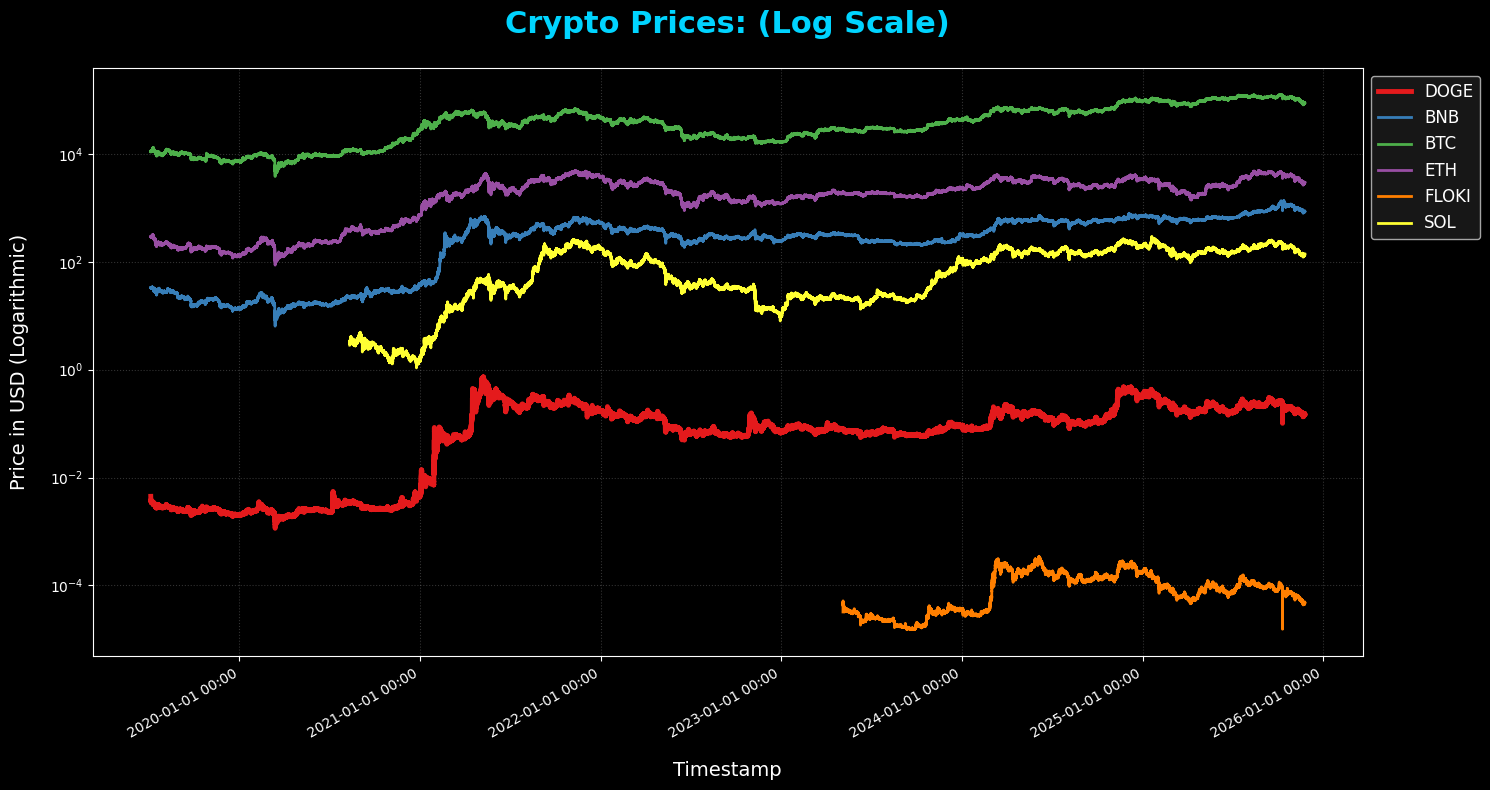

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(15, 8))

colors = plt.cm.Set1(range(len(data.columns)))

for i, col in enumerate(data.columns):
    width = 3.5 if col == "DOGE" else 2.0
    ax.plot(data.index, data[col], label=col, linewidth=width, color=colors[i])

ax.set_yscale("log")

ax.set_title(
    "Crypto Prices: (Log Scale)",
    fontsize=22,
    pad=25,
    color="#00d4ff",
    fontweight="bold",
)
ax.set_ylabel("Price in USD (Logarithmic)", fontsize=14, labelpad=15)
ax.set_xlabel("Timestamp", fontsize=14, labelpad=15)

ax.grid(True, which="both", linestyle=":", alpha=0.2)
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    fontsize=12,
    frameon=True,
    facecolor="#1e1e1e",
)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
plt.xticks(rotation=30, ha="right")

plt.tight_layout()

In [6]:
loaders.save_data(
    config.PROCESSED_DIR, config.PROCESSED_CRYPTOS_PATH, data, index=True
)